In [1]:
import re
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pprint import pprint

from jieba_postag_converter import get_postag_dict

In [2]:
def get_all_mrph_counts_df():
    corpora = ["cejc","mpdd"]
    situations = ["request","apology","thanksgiving"]
    methods = ["rewrited","translated"]
    types = ["query", "res"]
    all_count = []
    for corpus in corpora:
        for situation in situations:
            for method in methods:
                for typ in types:
                    cnt = 0
                    path = f'../mrphdata/{corpus}/{situation}/{method}_{typ}'
                    with open(path, 'r', encoding='utf_8_sig') as f:
                        for i,line in enumerate(f):
                            cnt += len(line[:-1].split())
                        all_count.append([corpus,situation,method,typ,cnt])
    all_count = pd.DataFrame(all_count,columns=['corpus','situation','method','sentence type','all mrph count'])
    return all_count

In [3]:
def CountsBy_Language(unaligned_count):
    count_by_language = unaligned_count.groupby("language")['count','all mrph count'].sum().reset_index()
    count_by_language["rate"] = count_by_language['count'] / count_by_language['all mrph count']
    # print(count_by_language)
    count_by_language = count_by_language['rate'].reset_index()
    count_by_language = np.array(count_by_language)

    label = ["ch","jp"]
    ncol = 2
    nrow = 1
    left = 1
    width = 0.15
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(9,6))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, data in enumerate(count_by_language):
#         print('i//ncol, i%ncol: {}, {}'.format(i//ncol, i%ncol))
        if i>=1:
            ax = plt.subplot2grid((nrow, ncol), (i//ncol, i%ncol),sharey=prev_ax)
        else:
            ax = plt.subplot2grid((nrow, ncol), (i//ncol, i%ncol))
        plt.bar(left,           count_by_language[i][1], width=width, align='center')
#         plt.xticks(left+width/2, data[0][0], rotation=4]5)
#         fig.suptitle('unaligned-words rates', fontsize=25)
        plt.title(label[i], fontsize=20)
        ax.legend()
        prev_ax = ax 
    plt.show()
#     return 0
            

In [4]:
def CountsBy_Language_Situation(unaligned_count):
    count_by_situation = unaligned_count.groupby(['language','situation',])['count','all mrph count'].sum()
    count_by_situation['rate'] = count_by_situation['count'] / count_by_situation['all mrph count']
    count_by_situation = count_by_situation['rate'].reset_index()
    count_by_situation = np.array(count_by_situation).reshape(2,3,3)
    ncol = count_by_situation.shape[0]
    nrow = 1
    left = 1
    width = 0.15
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(9,6))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, data in enumerate(count_by_situation):
    #     # print(i)
    #     print(titles[i][0][0])
#         print('i//ncol, i%ncol: {}, {}'.format(i//ncol, i%ncol))
        if i>=1:
            ax = plt.subplot2grid((nrow, ncol), (i//ncol, i%ncol),sharey=prev_ax)
        else:
            ax = plt.subplot2grid((nrow, ncol), (i//ncol, i%ncol))
        plt.bar(left-width,     data[0][2], width=width, align='center',label=data[0][1])
        plt.bar(left,           data[1][2], width=width, align='center',label=data[1][1])
        plt.bar(left+width,     data[2][2], width=width, align='center',label=data[2][1])
    #     plt.xticks(left+width/2, data[0][0], rotation=4]5)
    #     fig.suptitle('unaligned-words rates', fontsize=25)
        plt.title(data[0][0], fontsize=20)
        ax.legend()
        prev_ax = ax 
    plt.show()
#     return 0

In [5]:
def CountsBy_Language_Situation_Diff(unaligned_count):
    count_by_difftype = unaligned_count.groupby(['language','situation','corpus','difference type'])['count','all mrph count'].sum()
    count_by_difftype['rate'] = count_by_difftype['count'] / count_by_difftype['all mrph count']
    count_by_difftype = count_by_difftype['rate'].reset_index()

    lang_dict = {   'ch':{'mpdd':'del','cejc':'add'},
                    'jp':{'cejc':'del','mpdd':'add'}}
    situations = ['apology','request','thanksgiving']
    # sentence_type = ['query','res'] 

    ncol = 2
    nrow = 2
    left = 1
    width = 0.15
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(9,12))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    first = True
    i=0
    for i,(lang, v) in enumerate(lang_dict.items()):
#         print(v)
        for j,(corpus, diff) in enumerate(v.items()):
#             print('i//ncol, i%ncol: {}, {}'.format(j,i))
            if first != True:
                ax = plt.subplot2grid((nrow, ncol), (j,i),sharey=prev_ax)
            else:
                ax = plt.subplot2grid((nrow, ncol), (j,i))
                first = False
            plt.bar(left-width, count_by_difftype[\
                                        count_by_difftype["language"].isin([lang])&\
                                        count_by_difftype["difference type"].isin([diff])&\
                                        count_by_difftype['situation'].isin(["apology"])]['rate'], width=width, align='center',label="apology")
            plt.bar(left, count_by_difftype[\
                                        count_by_difftype["language"].isin([lang])&\
                                        count_by_difftype["difference type"].isin([diff])&\
                                        count_by_difftype['situation'].isin(["request"])]['rate'], width=width, align='center',label="request")
            plt.bar(left+width, count_by_difftype[\
                                        count_by_difftype["language"].isin([lang])&\
                                        count_by_difftype["difference type"].isin([diff])&\
                                        count_by_difftype['situation'].isin(["thanksgiving"])]['rate'], width=width, align='center',label="thanks")

            plt.title(f"[{lang}]  {diff}", fontsize=20)   
            ax.legend()
            prev_ax = ax
    plt.show() 
#     return 0

In [6]:
def CountsBy_Language_Situation_Diff_Method(unaligned_count):
    count_by_difftype = unaligned_count.groupby(['language','situation','corpus','method','difference type'])['count','all mrph count'].sum()
    count_by_difftype['rate'] = count_by_difftype['count'] / count_by_difftype['all mrph count']
    count_by_difftype = count_by_difftype['rate'].reset_index()

    lang_dict = {   'ch':{'mpdd':'del','cejc':'add'},
                    'jp':{'cejc':'del','mpdd':'add'}}
    situations = ['apology','request','thanksgiving']
    method_type = ['translated','rewrited']
    # sentence_type = ['query','res']
    
    ncol = 2
    nrow = 4
    left = 1
    width = 0.15
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(9,24))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    first = True
    i=0
    for i,(lang, v) in enumerate(lang_dict.items()):
    #     print(v)
        for j,(corpus, diff) in enumerate(v.items()):
            for k, method in enumerate(method_type):
                j = 2 if j>=1 else 0
    #             print('i//ncol, i%ncol: {}, {}'.format(j+k,i))
    #             print(f"[{lang}]  {diff} {method}")
                if first != True:
                    ax = plt.subplot2grid((nrow, ncol), (j+k,i),sharey=prev_ax)
                else:
                    ax = plt.subplot2grid((nrow, ncol), (j+k,i))
                    first = False
                plt.bar(left-width, count_by_difftype[\
                                            count_by_difftype["language"].isin([lang])&\
                                            count_by_difftype["difference type"].isin([diff])&\
                                            count_by_difftype['situation'].isin(["apology"])&\
                                            count_by_difftype['method'].isin([method])]['rate'], width=width, align='center',label="apology")
                plt.bar(left, count_by_difftype[\
                                            count_by_difftype["language"].isin([lang])&\
                                            count_by_difftype["difference type"].isin([diff])&\
                                            count_by_difftype['situation'].isin(["request"])&\
                                            count_by_difftype['method'].isin([method])]['rate'], width=width, align='center',label="request")
                plt.bar(left+width, count_by_difftype[\
                                            count_by_difftype["language"].isin([lang])&\
                                            count_by_difftype["difference type"].isin([diff])&\
                                            count_by_difftype['situation'].isin(["thanksgiving"])&\
                                            count_by_difftype['method'].isin([method])]['rate'], width=width, align='center',label="thanks")

                plt.title(f"[{lang}]  {diff} {method}", fontsize=20)   
                ax.legend()
                prev_ax = ax
    plt.show()
#     return 0

In [7]:
    def CountsBy_Language_Situation_Diff_Merhod_Type(unaligned_count):
        count_by_difftype = unaligned_count.groupby(['language','situation','corpus','method','sentence type','difference type'])['count','all mrph count'].sum()
        count_by_difftype['rate'] = count_by_difftype['count'] / count_by_difftype['all mrph count']
        count_by_difftype = count_by_difftype['rate'].reset_index()
        lang_dict = {   'ch':{'mpdd':'del','cejc':'add'},
                        'jp':{'cejc':'del','mpdd':'add'}}
        situations = ['apology','request','thanksgiving']
        method_type = ['translated','rewrited']
        sentence_type = ['query','res']

        ncol = 4
        nrow = 4
        left = 1
        width = 0.15
        plt.style.use('fivethirtyeight')
        fig = plt.figure(figsize=(18,24))
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        first = True
        i=0
        for l, sen_type in enumerate(sentence_type):
            l = 2 if l>=1 else 0
            for i,(lang, v) in enumerate(lang_dict.items()):
            #     print(v)
                for j,(corpus, diff) in enumerate(v.items()):
                    j = 2 if j>=1 else 0
                    for k, method in enumerate(method_type):
#                         print('i//ncol, i%ncol: {}, {}'.format(j+k,i+l))
#                         print(f"[{lang}]  {diff} {method}")
                        if first != True:
                            ax = plt.subplot2grid((nrow, ncol), (j+k,i+l),sharey=prev_ax)
                        else:
                            ax = plt.subplot2grid((nrow, ncol), (j+k,i+l))
                            first = False
                        plt.bar(left-width, count_by_difftype[\
                                                    count_by_difftype["language"].isin([lang])&\
                                                    count_by_difftype["difference type"].isin([diff])&\
                                                    count_by_difftype['situation'].isin(["apology"])&\
                                                    count_by_difftype['method'].isin([method])&\
                                                    count_by_difftype['sentence type'].isin([sen_type])]['rate'], width=width, align='center',label="apology")
                        plt.bar(left, count_by_difftype[\
                                                    count_by_difftype["language"].isin([lang])&\
                                                    count_by_difftype["difference type"].isin([diff])&\
                                                    count_by_difftype['situation'].isin(["request"])&\
                                                    count_by_difftype['method'].isin([method])&\
                                                    count_by_difftype['sentence type'].isin([sen_type])]['rate'], width=width, align='center',label="request")
                        plt.bar(left+width, count_by_difftype[\
                                                    count_by_difftype["language"].isin([lang])&\
                                                    count_by_difftype["difference type"].isin([diff])&\
                                                    count_by_difftype['situation'].isin(["thanksgiving"])&\
                                                    count_by_difftype['method'].isin([method])&\
                                                    count_by_difftype['sentence type'].isin([sen_type])]['rate'], width=width, align='center',label="thanks")

                        plt.title(f"[{lang}]  {diff} {method} {sen_type}", fontsize=20)   
                        ax.legend()
                        prev_ax = ax
        plt.show() 
#         return 0

In [8]:
import json
from collections import OrderedDict
import pprint

class relations():
    def __init__(self):
        with open('metadata.json') as f:
            d = json.load(f)
        self.dict = d
        
    def get(self, val):
        if val in self.dict['position']['inferior']:
            return 'inferior'
        if val in self.dict['position']['peer']:
            return 'peer'
        if val in self.dict['position']['superior']:
            return 'superior'

situation = 'apology'
relation_pair = []
relation_path = f'../relation_pair/cejc/{situation}/relation_pair'
upperRelation = relations()
with open(relation_path, 'r', encoding='utf-8-sig')as f:
    reader = csv.reader(f)
    for line in reader:
        line[0] = upperRelation.get(line[0])
        line[1] = upperRelation.get(line[1])
        relation_pair.append(line)
relation_pair

[['superior', 'inferior'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['inferior', 'superior'],
 ['inferior', 'superior'],
 ['peer', 'peer'],
 ['superior', 'inferior'],
 ['inferior', 'superior'],
 ['inferior', 'superior'],
 ['inferior', 'superior'],
 ['inferior', 'superior'],
 ['inferior', 'superior'],
 ['superior', 'inferior'],
 ['superior', 'inferior'],
 ['superior', 'inferior'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', 'peer'],
 ['peer', '

In [9]:
t_path = "analysis_table.csv"
df = pd.read_csv(t_path)

# # For Only CONTENT WORDS
# t_path = "analysis_table_upper.csv"
# df = pd.read_csv(t_path)
# # get only content words
# content_words = [   '名詞','動詞','形容詞','副詞','','','',
#                     'a','d','i','j','k','l','n','t','v'
#                 ]
# df = df[df['pos'].isin(content_words)]


all_mrph_counts_df = get_all_mrph_counts_df()

def count(x):
    return x.count()

unaligned_count = df.groupby(['corpus', 'situation', 'method', 'sentence type', 'difference type'])['line'].apply(count).reset_index()
unaligned_count = unaligned_count.rename(columns={'line': 'count'})
unaligned_count = pd.merge(unaligned_count,all_mrph_counts_df, on=['corpus', 'situation', 'method', 'sentence type'], how='outer')
unaligned_count['language'] = ["jp" if ((c=='cejc') and (d=='del')) or ((c=='mpdd') and (d=='add')) else "ch" for c,d in zip(unaligned_count['corpus'],unaligned_count['difference type'])]


# Counts by Language

/home/yamashita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
No handles with labels found to put in legend.
No handles with labels found to put in legend.


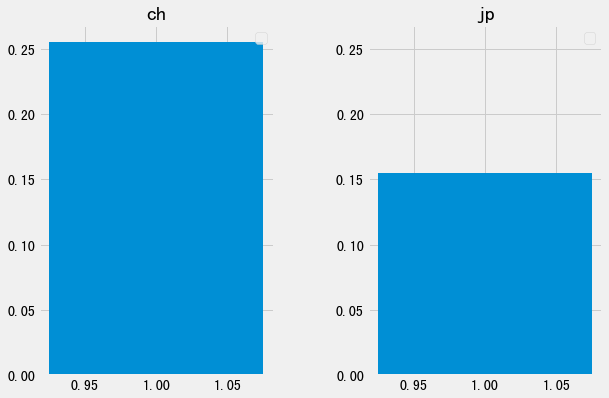

In [10]:
CountsBy_Language(unaligned_count)

# Counts by Language - Situation

/home/yamashita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


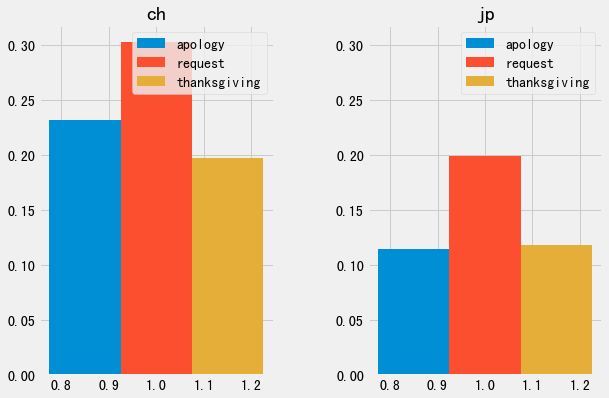

In [11]:
CountsBy_Language_Situation(unaligned_count)

# Count by Language - Situation - Difference operation type

/home/yamashita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


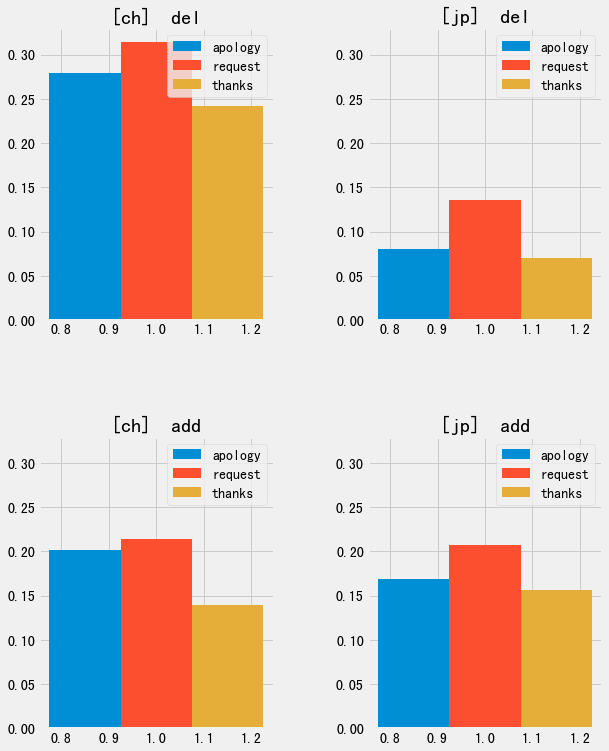

In [12]:
CountsBy_Language_Situation_Diff(unaligned_count)

# Count by Language - Situation - Difference operation type - Method type

/home/yamashita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


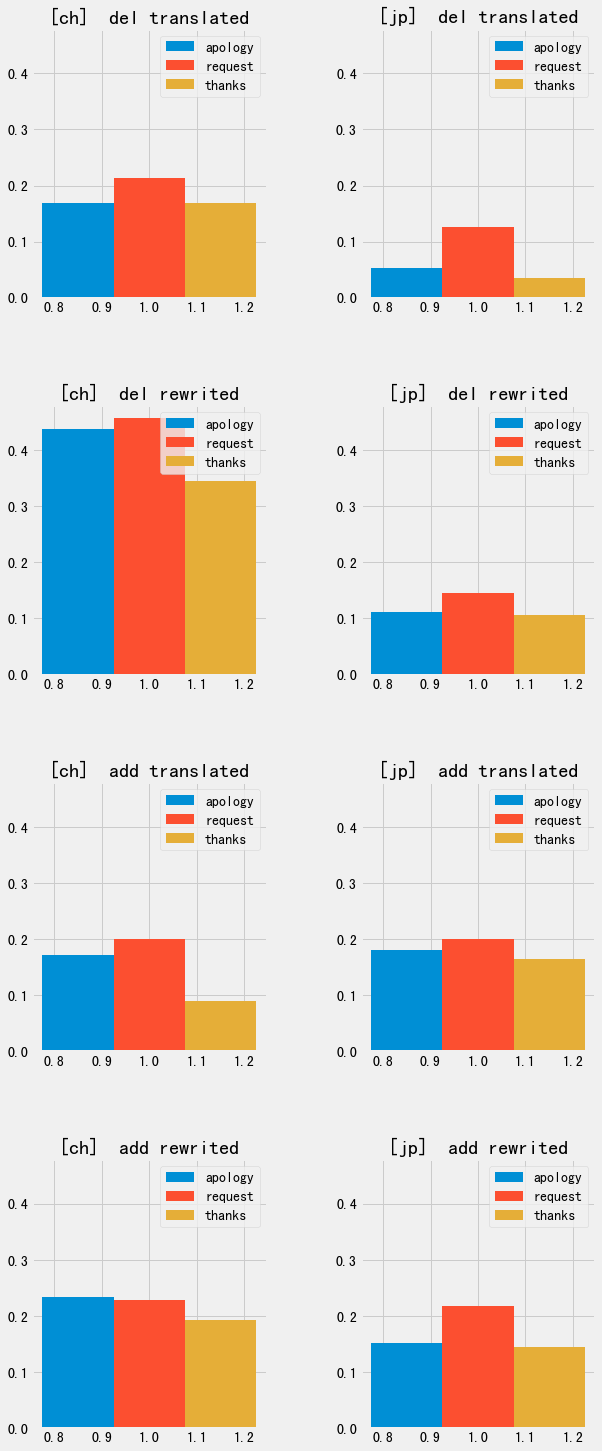

In [13]:
CountsBy_Language_Situation_Diff_Method(unaligned_count)

# Count by Language - Situation - Difference operation type - Method type - Sentence type

/home/yamashita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


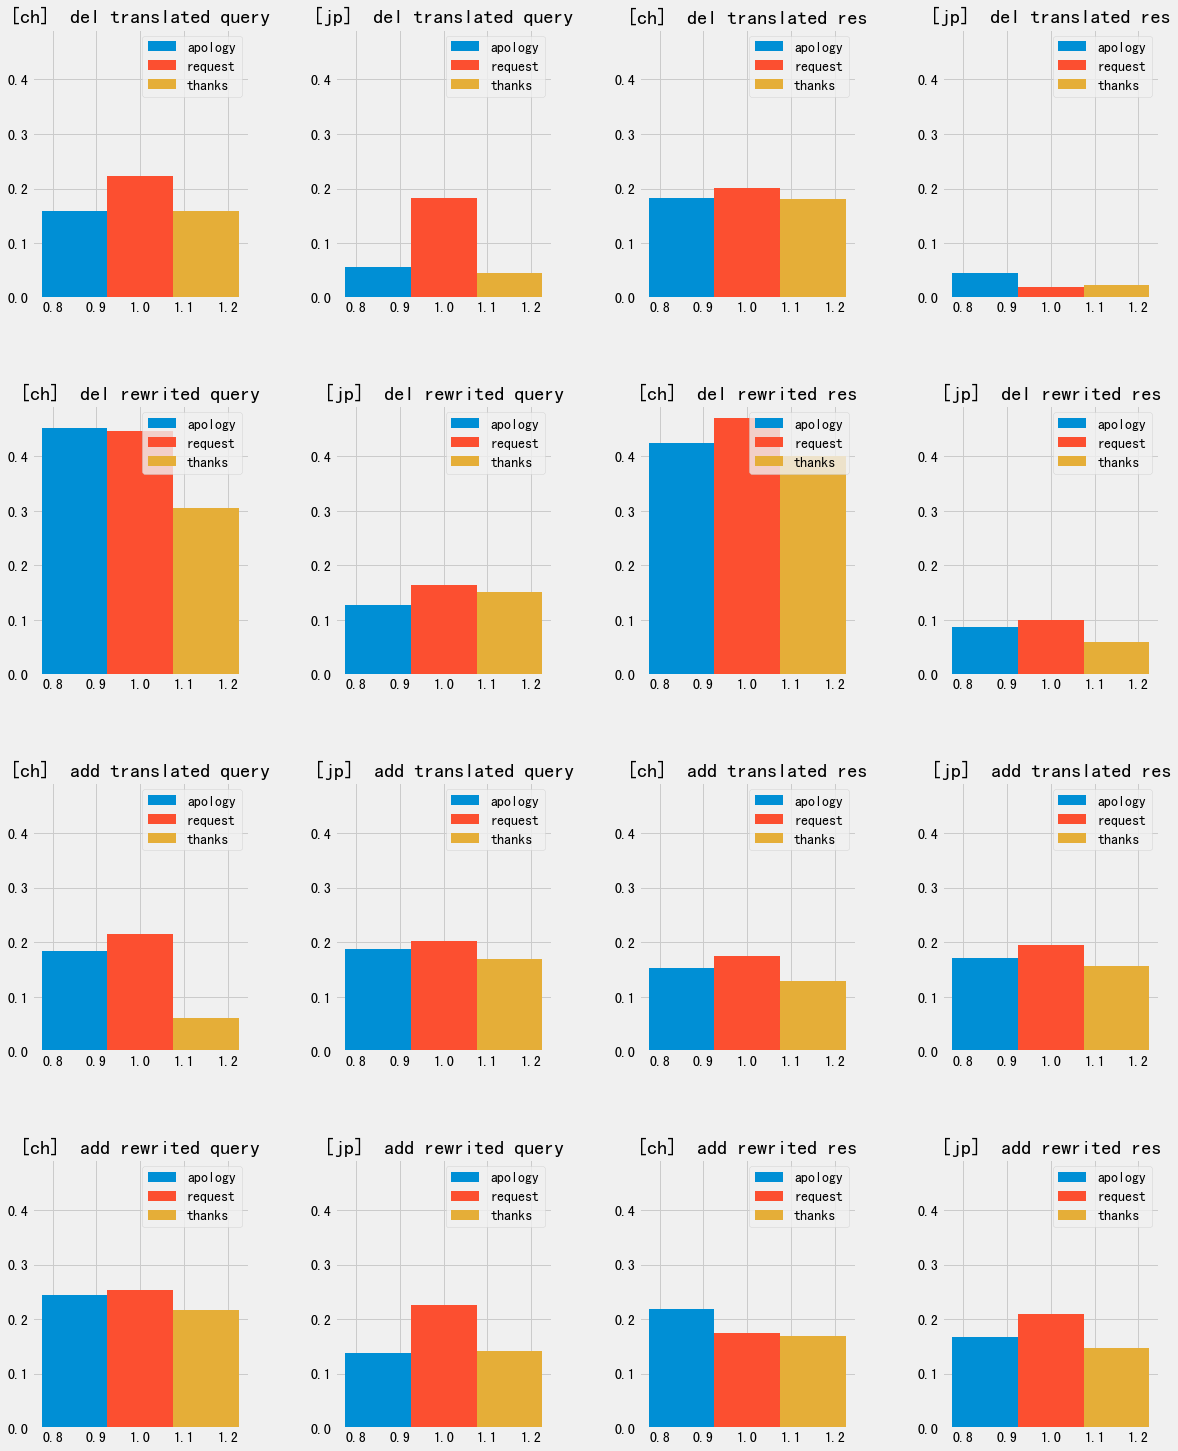

In [14]:
CountsBy_Language_Situation_Diff_Merhod_Type(unaligned_count)

# Count by Language - Situation - Difference operation type - Method type - Sentence type
## Content Words ONLY

/home/yamashita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


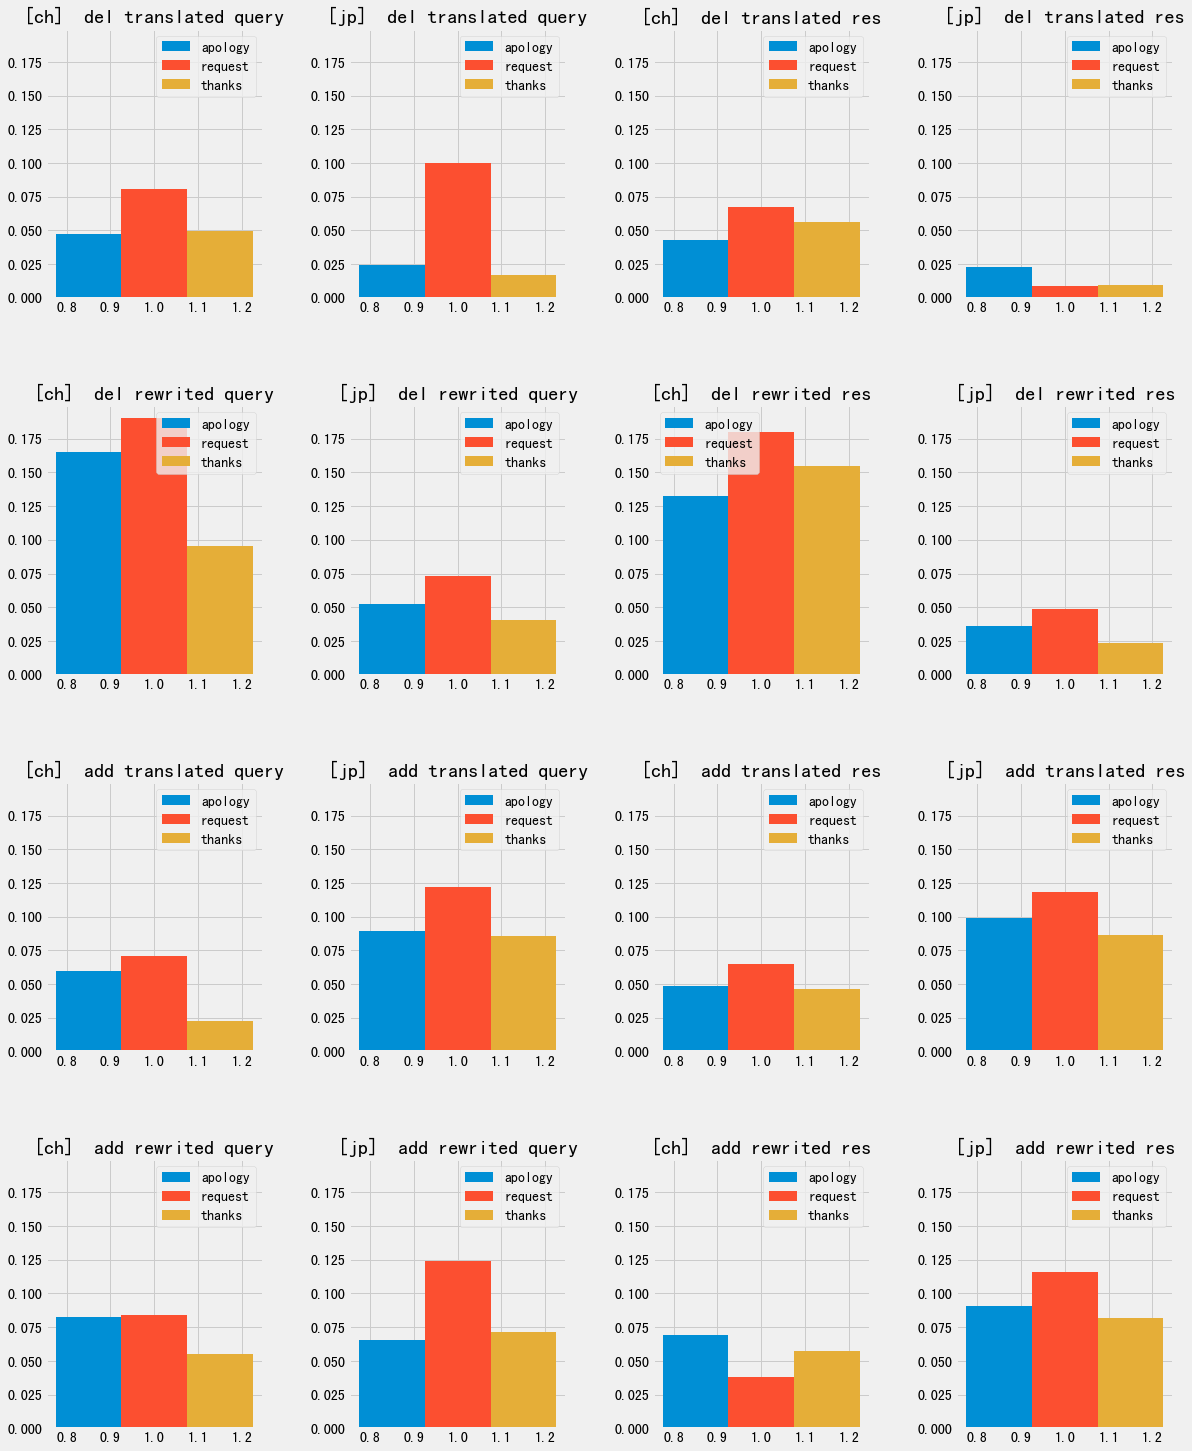

In [15]:
# For Only CONTENT WORDS
t_path = "analysis_table_upper.csv"
df = pd.read_csv(t_path)
# get only content words
content_words = [   '名詞','動詞','形容詞','','','',
                    'a','i','j','l','n','t','v'
                ]
df = df[df['pos'].isin(content_words)]

all_mrph_counts_df = get_all_mrph_counts_df()

def count(x):
    return x.count()

unaligned_count = df.groupby(['corpus', 'situation', 'method', 'sentence type', 'difference type'])['line'].apply(count).reset_index()
unaligned_count = unaligned_count.rename(columns={'line': 'count'})
unaligned_count = pd.merge(unaligned_count,all_mrph_counts_df, on=['corpus', 'situation', 'method', 'sentence type'], how='outer')
unaligned_count['language'] = ["jp" if ((c=='cejc') and (d=='del')) or ((c=='mpdd') and (d=='add')) else "ch" for c,d in zip(unaligned_count['corpus'],unaligned_count['difference type'])]
CountsBy_Language_Situation_Diff_Merhod_Type(unaligned_count)

## 1. There are almost not differences about the rates of unaligned-words btw content-word ONLY or not.

## 2. There is a big difference btw MT and HT in the case of CH -> JP del, which is the highest unaligned-word rate.


The graph shows unaligned words ranking (CH->JP del / content and function words)
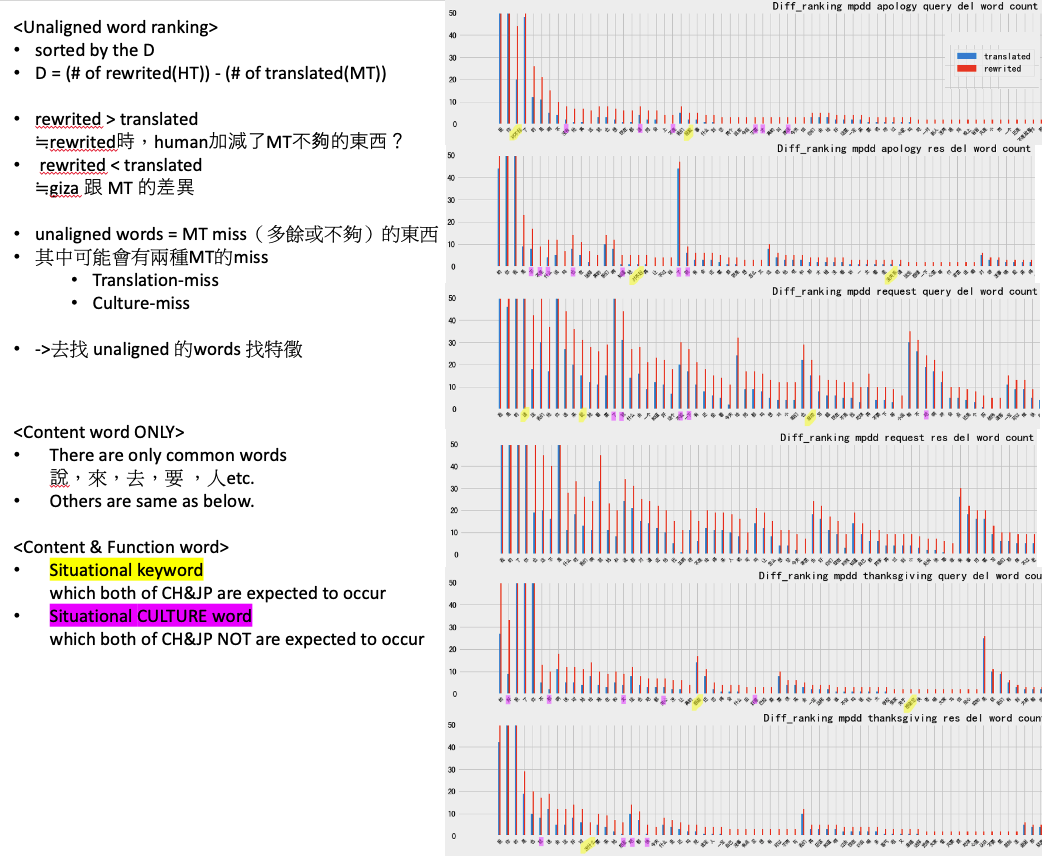
Examples is in "show_ranking.ipynb"

# save tables

In [34]:
    import os
    def get_count_table(unaligned_count):
        count_by_difftype = unaligned_count.groupby(['language','situation','corpus','method','sentence type','difference type'])['count','all mrph count'].sum()
        
        dir_name = "for_thesis/unaligned_count/"
        os.makedirs(dir_name, exist_ok=True)
        
        display(count_by_difftype.reset_index())
        count_by_difftype.reset_index().to_csv(dir_name+'counts.csv',encoding='utf_8_sig')
        
        count_by_difftype['rate'] = count_by_difftype['count'] / count_by_difftype['all mrph count']
        count_by_difftype = count_by_difftype['rate'].reset_index()
        display(count_by_difftype)
        count_by_difftype.to_csv(dir_name+'rates.csv',encoding='utf_8_sig')
        
        def minmax_norm(df_input):
            df = df_input['rate']
            df_input['rate'] = (df - df.min()) / ( df.max() - df.min())
            return df_input

        df_minmax_norm = minmax_norm(count_by_difftype)
        display(df_minmax_norm)
        count_by_difftype.to_csv(dir_name+'maxminnormed_rates.csv',encoding='utf_8_sig')
#         lang_dict = {   'ch':{'mpdd':'del','cejc':'add'},
#                         'jp':{'cejc':'del','mpdd':'add'}}
#         situations = ['apology','request','thanksgiving']
#         method_type = ['translated','rewrited']
#         sentence_type = ['query','res']
        
#         ncol = 4
#         nrow = 4
#         left = 1
#         width = 0.15
#         plt.style.use('fivethirtyeight')
#         fig = plt.figure(figsize=(18,24))
#         plt.subplots_adjust(wspace=0.4, hspace=0.4)
#         first = True
#         i=0
#         for l, sen_type in enumerate(sentence_type):
#             l = 2 if l>=1 else 0
#             for i,(lang, v) in enumerate(lang_dict.items()):
#             #     print(v)
#                 for j,(corpus, diff) in enumerate(v.items()):
#                     j = 2 if j>=1 else 0
#                     for k, method in enumerate(method_type):
# #                         print('i//ncol, i%ncol: {}, {}'.format(j+k,i+l))
# #                         print(f"[{lang}]  {diff} {method}")
#                         if first != True:
#                             ax = plt.subplot2grid((nrow, ncol), (j+k,i+l),sharey=prev_ax)
#                         else:
#                             ax = plt.subplot2grid((nrow, ncol), (j+k,i+l))
#                             first = False
#                         plt.bar(left-width, count_by_difftype[\
#                                                     count_by_difftype["language"].isin([lang])&\
#                                                     count_by_difftype["difference type"].isin([diff])&\
#                                                     count_by_difftype['situation'].isin(["apology"])&\
#                                                     count_by_difftype['method'].isin([method])&\
#                                                     count_by_difftype['sentence type'].isin([sen_type])]['rate'], width=width, align='center',label="apology")
#                         plt.bar(left, count_by_difftype[\
#                                                     count_by_difftype["language"].isin([lang])&\
#                                                     count_by_difftype["difference type"].isin([diff])&\
#                                                     count_by_difftype['situation'].isin(["request"])&\
#                                                     count_by_difftype['method'].isin([method])&\
#                                                     count_by_difftype['sentence type'].isin([sen_type])]['rate'], width=width, align='center',label="request")
#                         plt.bar(left+width, count_by_difftype[\
#                                                     count_by_difftype["language"].isin([lang])&\
#                                                     count_by_difftype["difference type"].isin([diff])&\
#                                                     count_by_difftype['situation'].isin(["thanksgiving"])&\
#                                                     count_by_difftype['method'].isin([method])&\
#                                                     count_by_difftype['sentence type'].isin([sen_type])]['rate'], width=width, align='center',label="thanks")

#                         plt.title(f"[{lang}]  {diff} {method} {sen_type}", fontsize=20)   
#                         ax.legend()
#                         prev_ax = ax
#         plt.show() 
        return 0

In [35]:
count_by_difftype=get_count_table(unaligned_count)

/home/yamashita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,language,situation,corpus,method,sentence type,difference type,count,all mrph count
0,ch,apology,cejc,rewrited,query,add,401,4839
1,ch,apology,cejc,rewrited,res,add,229,3313
2,ch,apology,cejc,translated,query,add,338,5662
3,ch,apology,cejc,translated,res,add,162,3327
4,ch,apology,mpdd,rewrited,query,del,364,2204
5,ch,apology,mpdd,rewrited,res,del,286,2153
6,ch,apology,mpdd,translated,query,del,159,3376
7,ch,apology,mpdd,translated,res,del,125,2894
8,ch,request,cejc,rewrited,query,add,147,1742
9,ch,request,cejc,rewrited,res,add,29,764


,language,situation,corpus,method,sentence type,difference type,rate
0,ch,apology,cejc,rewrited,query,add,0.082868
1,ch,apology,cejc,rewrited,res,add,0.069122
2,ch,apology,cejc,translated,query,add,0.059696
3,ch,apology,cejc,translated,res,add,0.048693
4,ch,apology,mpdd,rewrited,query,del,0.165154
5,ch,apology,mpdd,rewrited,res,del,0.132838
6,ch,apology,mpdd,translated,query,del,0.047097
7,ch,apology,mpdd,translated,res,del,0.043193
8,ch,request,cejc,rewrited,query,add,0.084386
9,ch,request,cejc,rewrited,res,add,0.037958


,language,situation,corpus,method,sentence type,difference type,rate
0,ch,apology,cejc,rewrited,query,add,0.408886
1,ch,apology,cejc,rewrited,res,add,0.333144
2,ch,apology,cejc,translated,query,add,0.281212
3,ch,apology,cejc,translated,res,add,0.220583
4,ch,apology,mpdd,rewrited,query,del,0.862267
5,ch,apology,mpdd,rewrited,res,del,0.684210
6,ch,apology,mpdd,translated,query,del,0.211793
7,ch,apology,mpdd,translated,res,del,0.190281
8,ch,request,cejc,rewrited,query,add,0.417247
9,ch,request,cejc,rewrited,res,add,0.161439
